<a href="https://colab.research.google.com/github/Chandra142/SkillCraft_Internship/blob/main/SCT_ML_03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import zipfile
import os

# Unzip the file
with zipfile.ZipFile("/content/PetImages.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

print("✅ Unzipped successfully!")


✅ Unzipped successfully!


In [53]:
def predict_uploaded_image(image_path, model):
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, confusion_matrix
    import seaborn as sns

    # Load and preprocess image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE if USE_GRAYSCALE else cv2.IMREAD_COLOR)
    if img is None:
        print("❌ Failed to load image.")
        return

    img_resized = cv2.resize(img, IMG_SIZE)
    img_flat = img_resized.flatten().reshape(1, -1) / 255.0

    # Apply PCA if used
    if 'pca' in globals():
        img_flat = pca.transform(img_flat)

    # Predict
    probs = model.predict_proba(img_flat)[0]
    confidence = max(probs)
    pred = np.argmax(probs)
    raw_label = "Dog" if pred == 1 else "Cat"

    # Smart threshold logic
    if confidence >= 0.7:
        display_label = raw_label
        prefix = "✅ Confident prediction:"
    elif confidence >= 0.5:
        display_label = f"⚠️ Uncertain: {raw_label}"
        prefix = "⚠️ Low confidence:"
    else:
        display_label = "❌ Neither Cat nor Dog"
        prefix = "❌ Rejected:"

    # Display image
    img_show = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB) if not USE_GRAYSCALE else img_resized
    plt.imshow(img_show, cmap='gray' if USE_GRAYSCALE else None)
    plt.title(f"{display_label} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()

    # Show result
    print(f"{prefix} {display_label}")
    print(f"ℹ️ Raw model prediction: {raw_label} with confidence {confidence:.2f}")

    # Accuracy & confusion matrix
    y_pred_test = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_test)
    print(f"\n📊 Test Set Accuracy: {acc:.2f}")

    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix (Test Set)")
    plt.show()


Saving 100.jpg to 100 (2).jpg


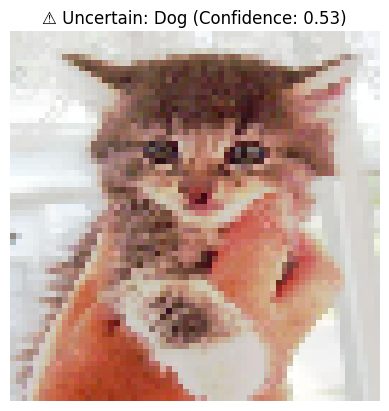

⚠️ Low confidence: ⚠️ Uncertain: Dog
ℹ️ Raw model prediction: Dog with confidence 0.53

📊 Test Set Accuracy: 0.62


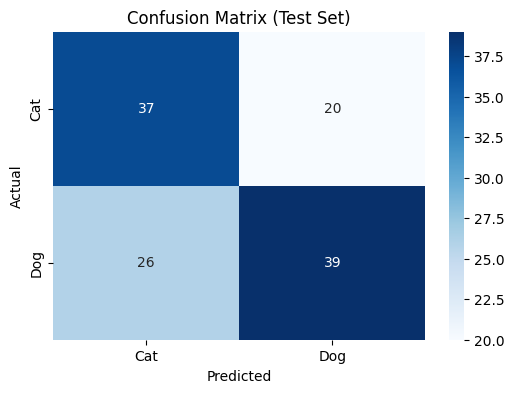

In [57]:
# Upload and test
uploaded = files.upload()
predict_uploaded_image(list(uploaded.keys())[0], svm_model)